In [312]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

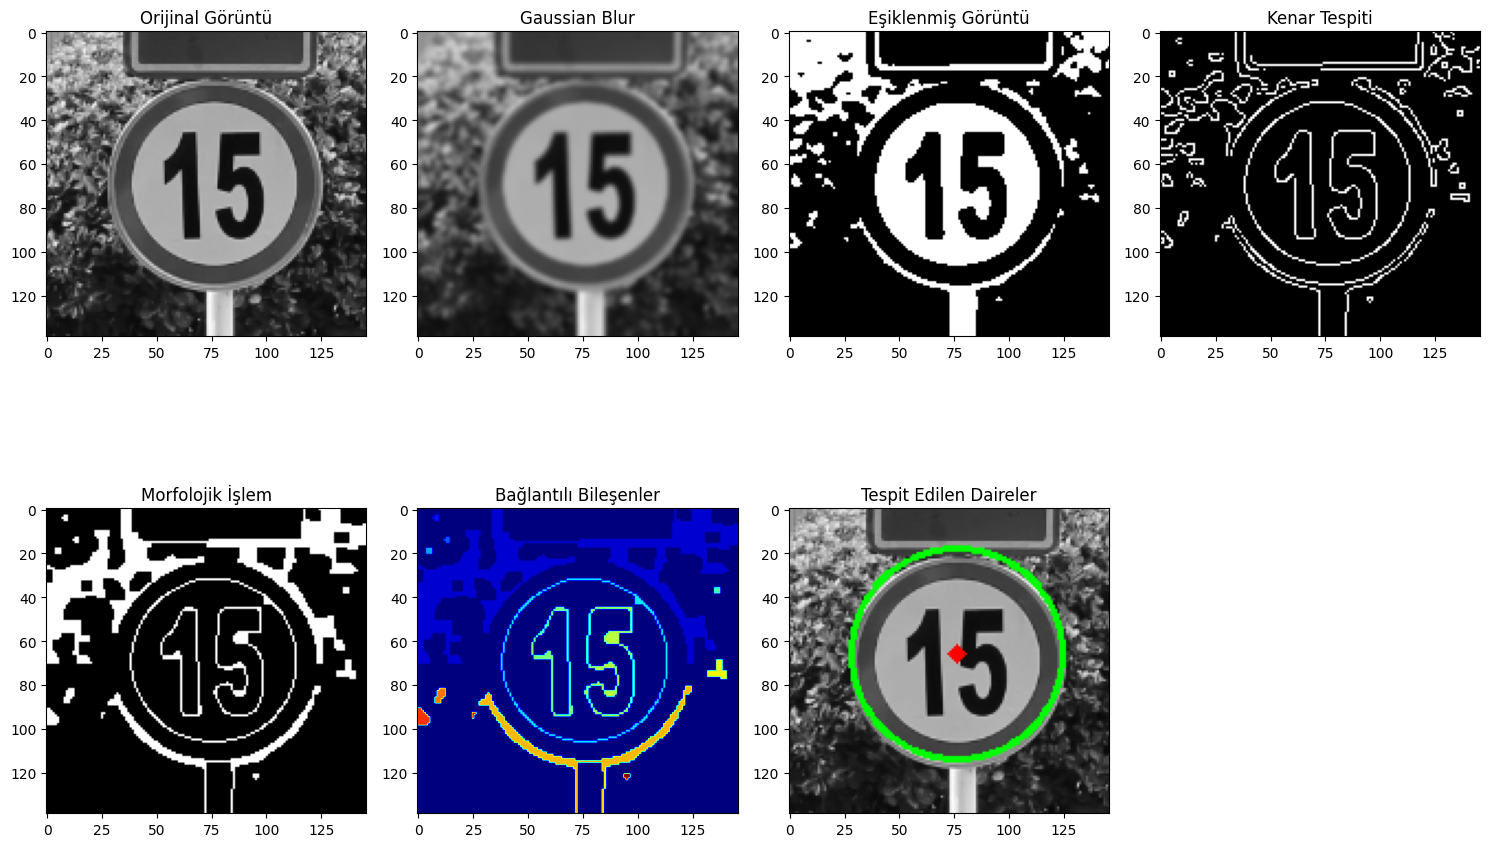

In [313]:


images_dir = 'images_gray'
test_images_dir = 'test'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image =  cv2.imread(os.path.join(images_dir, train_images_dir,'train_easy_1.png'))

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im = cv2.connectedComponents(eroded_image)

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    eroded_image, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)

# Daireleri Görselleştir
output_image = gray_image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        # Daire çiz
        cv2.circle(output_image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        # Merkez işaretle
        cv2.circle(output_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)

# Görüntüleri Görselleştir
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Bağlantılı Bileşenler"), plt.imshow(labels_im, cmap='jet')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


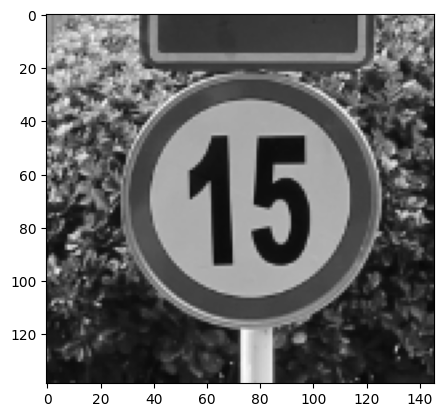

In [314]:
plt.imshow(gray_image)

In [315]:
print(os.path.join(images_dir, train_images_dir,'train_easy_1.png'))

images_gray/train/train_easy_1.png


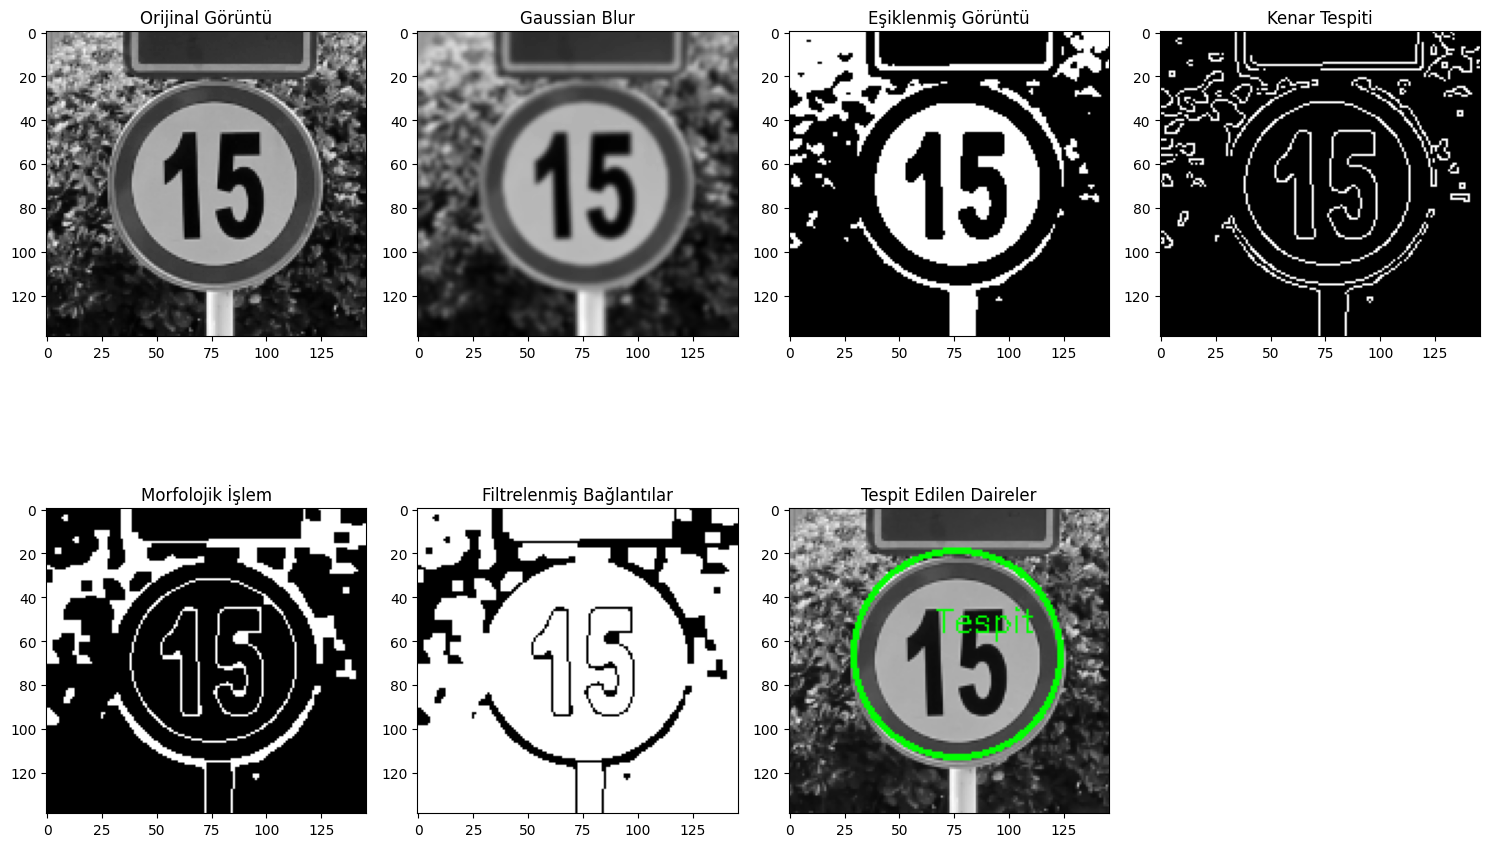

In [316]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Klasör ayarları
images_dir = 'images_gray'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image = cv2.imread(os.path.join(images_dir, train_images_dir, 'train_easy_1.png'), cv2.IMREAD_GRAYSCALE)

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(eroded_image)

# Bağlantılı bileşenleri filtreleme: Yalnızca yeterince büyük ve yuvarlak bileşenler
filtered_labels = []
min_area = 100  # Minimum alan
for label, stat in enumerate(stats):
    if stat[cv2.CC_STAT_AREA] > min_area:
        aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
        if 0.8 < aspect_ratio < 1.2:  # Neredeyse kare/daire biçimli
            filtered_labels.append(label)

# Filtrelenmiş bağlantılı bileşenleri görselleştirme
filtered_components = np.zeros_like(eroded_image)
for label in filtered_labels:
    filtered_components[labels_im == label] = 255

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    filtered_components, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)

# Sadece plaka bölgelerine çizim yap
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        # Plaka üzerindeki daireyi çiz
        cv2.circle(output_image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        cv2.putText(output_image, "Tespit", (circle[0] - 10, circle[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Görüntüleri Görselleştir
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Filtrelenmiş Bağlantılar"), plt.imshow(filtered_components, cmap='gray')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


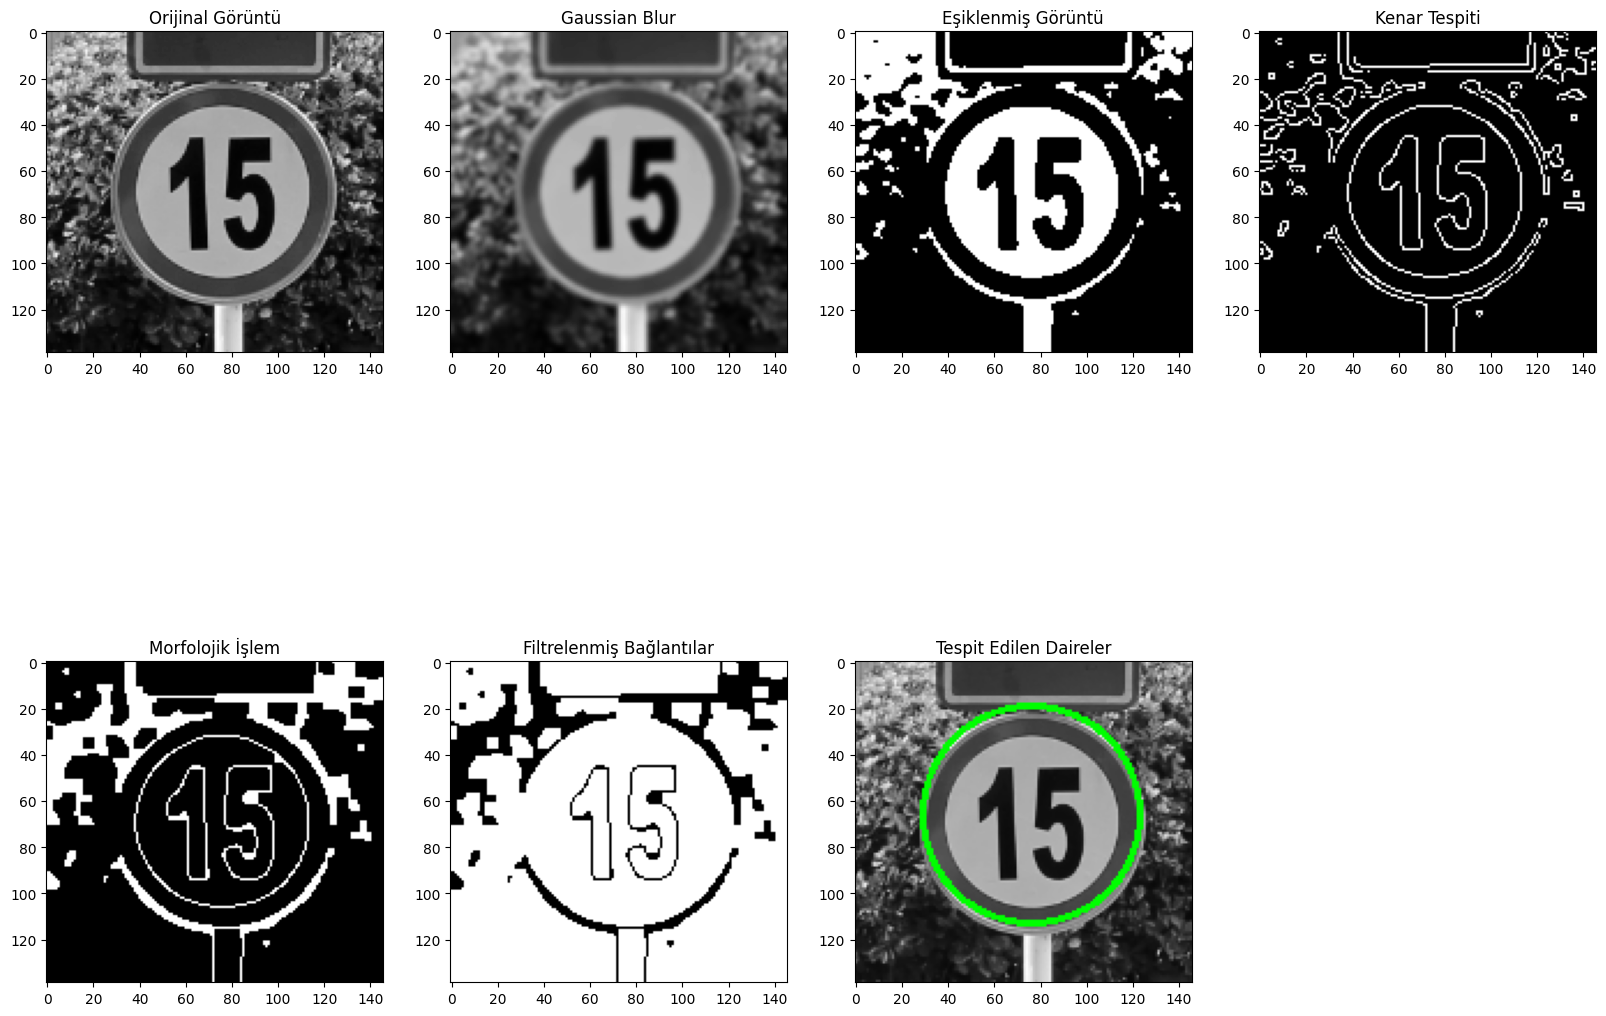

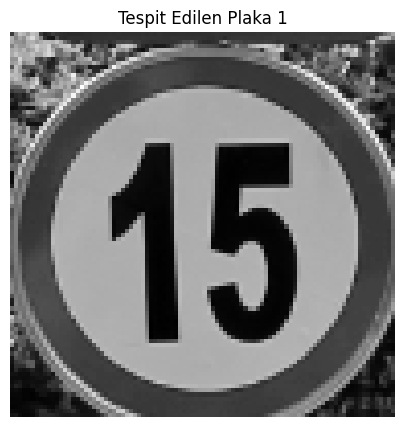

<Figure size 640x480 with 0 Axes>

In [317]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Klasör ayarları
images_dir = 'images_gray'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image = cv2.imread(os.path.join(images_dir, train_images_dir, 'train_easy_1.png'), cv2.IMREAD_GRAYSCALE)

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(eroded_image)

# Bağlantılı bileşenleri filtreleme: Yalnızca yeterince büyük ve yuvarlak bileşenler
filtered_labels = []
min_area = 100  # Minimum alan
for label, stat in enumerate(stats):
    if stat[cv2.CC_STAT_AREA] > min_area:
        aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
        if 0.8 < aspect_ratio < 1.2:  # Neredeyse kare/daire biçimli
            filtered_labels.append(label)

# Filtrelenmiş bağlantılı bileşenleri görselleştirme
filtered_components = np.zeros_like(eroded_image)
for label in filtered_labels:
    filtered_components[labels_im == label] = 255

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    filtered_components, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)

# Tespit edilen daireleri işaretleme
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)  # Renkli kopya oluştur
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)

# Görüntüleri Görselleştir
plt.figure(figsize=(20, 15))
plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Filtrelenmiş Bağlantılar"), plt.imshow(filtered_components, cmap='gray')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

# Yalnızca plaka bölgelerini çıkart
if circles is not None:
    for i, circle in enumerate(circles[0, :]):
        x, y, r = circle
        cropped_plate = gray_image[y - r:y + r, x - r:x + r]
        
        # Plaka için ayrı görselleştirme
        plt.figure(figsize=(5, 5))
        plt.title(f"Tespit Edilen Plaka {i+1}")
        plt.imshow(cropped_plate, cmap='gray')
        plt.axis('off')
        plt.show()

plt.tight_layout()
plt.show()


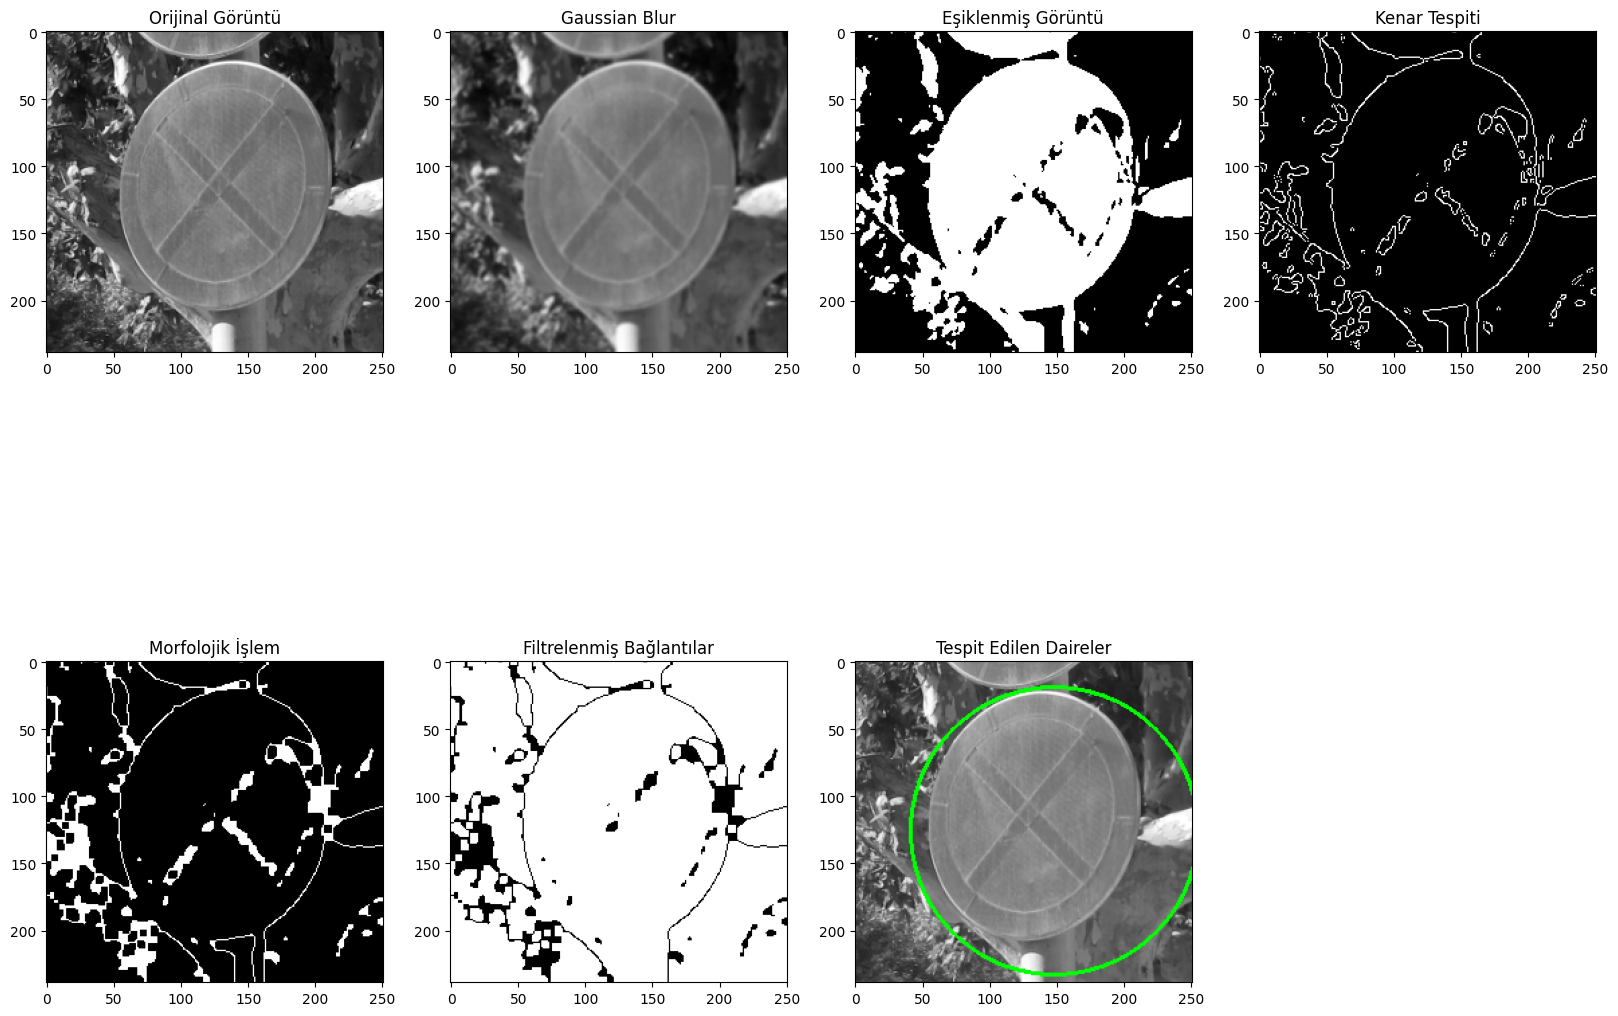

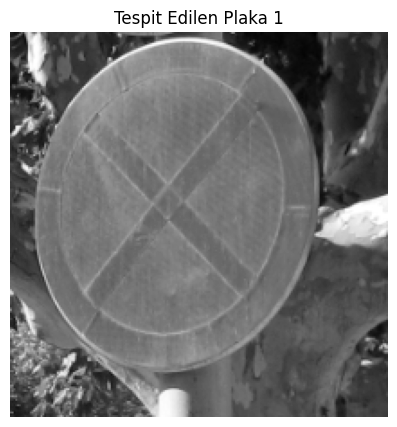

<Figure size 640x480 with 0 Axes>

In [318]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Klasör ayarları
images_dir = 'images_gray'
train_images_dir = 'train'

# 1. Görüntüyü Yükle ve Gri Tonlamaya Çevir
gray_image = cv2.imread(os.path.join(images_dir, train_images_dir, 'train_easy_2.png'), cv2.IMREAD_GRAYSCALE)

# 2. Gaussian Blur ile Gürültüyü Azalt
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 3. Eşikleme ile İkili Görüntü Oluştur
_, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)

# 4. Kenar Tespiti (Canny Edge Detection)
edges = cv2.Canny(thresholded_image, 100, 200)

# 5. Morfolojik Operatörler: Genişletme ve Aşındırma
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(edges, kernel, iterations=1)
eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

# 6. Bağlantılı Bileşen Analizi
num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(eroded_image)

# Bağlantılı bileşenleri filtreleme: Yalnızca yeterince büyük ve yuvarlak bileşenler
filtered_labels = []
min_area = 100  # Minimum alan
for label, stat in enumerate(stats):
    if stat[cv2.CC_STAT_AREA] > min_area:
        aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
        if 0.8 < aspect_ratio < 1.2:  # Neredeyse kare/daire biçimli
            filtered_labels.append(label)

# Filtrelenmiş bağlantılı bileşenleri görselleştirme
filtered_components = np.zeros_like(eroded_image)
for label in filtered_labels:
    filtered_components[labels_im == label] = 255

# 7. Daire Tespiti (Hough Transform)
circles = cv2.HoughCircles(
    filtered_components, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=30, 
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=200
)

# Tespit edilen daireleri işaretleme
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)  # Renkli kopya oluştur
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 2)

# Görüntüleri Görselleştir
plt.figure(figsize=(20, 15))
plt.subplot(2, 4, 1), plt.title("Orijinal Görüntü"), plt.imshow(gray_image, cmap='gray')
plt.subplot(2, 4, 2), plt.title("Gaussian Blur"), plt.imshow(blurred_image, cmap='gray')
plt.subplot(2, 4, 3), plt.title("Eşiklenmiş Görüntü"), plt.imshow(thresholded_image, cmap='gray')
plt.subplot(2, 4, 4), plt.title("Kenar Tespiti"), plt.imshow(edges, cmap='gray')
plt.subplot(2, 4, 5), plt.title("Morfolojik İşlem"), plt.imshow(eroded_image, cmap='gray')
plt.subplot(2, 4, 6), plt.title("Filtrelenmiş Bağlantılar"), plt.imshow(filtered_components, cmap='gray')
plt.subplot(2, 4, 7), plt.title("Tespit Edilen Daireler"), plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))

# Yalnızca plaka bölgelerini çıkart
if circles is not None:
    for i, circle in enumerate(circles[0, :]):
        x, y, r = circle
        cropped_plate = gray_image[y - r:y + r, x - r:x + r]
        
        # Plaka için ayrı görselleştirme
        plt.figure(figsize=(5, 5))
        plt.title(f"Tespit Edilen Plaka {i+1}")
        plt.imshow(cropped_plate, cmap='gray')
        plt.axis('off')
        plt.show()
else:
    print("Daire tespit edilemedi.")

plt.tight_layout()
plt.show()


In [319]:
# make all the functions as a class

class TrafficSignDetector():
    def __init__(self, images_dir, train_images_dir):
        self.images_dir = images_dir
        self.train_images_dir = train_images_dir

    def load_image(self, image_name):
        image_path = os.path.join(self.images_dir, self.train_images_dir, image_name)
        return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    def preprocess_image(self, image):
        # 2. Gaussian Blur ile Gürültüyü Azalt
        blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

        # 3. Eşikleme ile İkili Görüntü Oluştur
        _, thresholded_image = cv2.threshold(blurred_image, 120, 255, cv2.THRESH_BINARY)
        return thresholded_image

    def detect_circles(self, image):
        # 4. Kenar Tespiti (Canny Edge Detection)
        edges = cv2.Canny(image, 100, 200)

        # 5. Morfolojik Operatörler: Genişletme ve Aşındırma
        kernel = np.ones((5, 5), np.uint8)
        dilated_image = cv2.dilate(edges, kernel, iterations=1)
        eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

        # 6. Ba
        num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(eroded_image)
        
        

In [320]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


class TrafficSignDetector:
    def __init__(self, images_dir, train_images_dir):
        """
        Initialize the TrafficSignDetector with directories for images.

        :param images_dir: Path to the root image directory
        :param train_images_dir: Path to the training images subdirectory
        """
        self.images_dir = images_dir
        self.train_images_dir = train_images_dir

        # Placeholder for image processing steps
        self.gray_image = None
        self.blurred_image = None
        self.thresholded_image = None
        self.edges = None
        self.eroded_image = None
        self.filtered_components = None
        self.output_image = None
        self.circles = None
        self.detected_plates = []

    def process_image(self, image_name):
        """
        Process an image through the detection pipeline.
        
        :param image_name: Filename of the image to process
        """
        # 1. Load and convert to grayscale
        image_path = os.path.join(self.images_dir, self.train_images_dir, image_name)
        self.gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # 2. Gaussian blur
        self.blurred_image = cv2.GaussianBlur(self.gray_image, (5, 5), 0)

        # 3. Thresholding
        _, self.thresholded_image = cv2.threshold(self.blurred_image, 120, 255, cv2.THRESH_BINARY)

        # 4. Edge detection
        self.edges = cv2.Canny(self.thresholded_image, 100, 200)

        # 5. Morphological operations
        kernel = np.ones((5, 5), np.uint8)
        dilated_image = cv2.dilate(self.edges, kernel, iterations=1)
        self.eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

        # 6. Connected components analysis
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(self.eroded_image)
        self.filtered_components = np.zeros_like(self.eroded_image)
        min_area = 100  # Minimum area for valid components
        for label, stat in enumerate(stats):
            if stat[cv2.CC_STAT_AREA] > min_area:
                aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
                if 0.8 < aspect_ratio < 1.2:  # Approximate square/circle shape
                    self.filtered_components[labels == label] = 255

        # 7. Circle detection (Hough Transform)
        self.circles = cv2.HoughCircles(
            self.filtered_components,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=30,
            param1=50,
            param2=30,
            minRadius=10,
            maxRadius=200,
        )

        # 8. Draw detected circles and extract plates
        self.output_image = cv2.cvtColor(self.gray_image, cv2.COLOR_GRAY2BGR)
        if self.circles is not None:
            self.circles = np.uint16(np.around(self.circles))
            for circle in self.circles[0, :]:
                x, y, r = circle
                cv2.circle(self.output_image, (x, y), r, (0, 255, 0), 2)
                cropped_plate = self.gray_image[y - r : y + r, x - r : x + r]
                self.detected_plates.append(cropped_plate)

    def visualize_results(self):
        """
        Visualize intermediate results and detected plates.
        """
        titles = [
            "Original Image",
            "Gaussian Blur",
            "Thresholded Image",
            "Edges",
            "Morphological Image",
            "Filtered Components",
            "Detected Circles",
        ]
        images = [
            self.gray_image,
            self.blurred_image,
            self.thresholded_image,
            self.edges,
            self.eroded_image,
            self.filtered_components,
            self.output_image,
        ]

        plt.figure(figsize=(20, 10))
        for i, (title, img) in enumerate(zip(titles, images), 1):
            if img is not None:
                plt.subplot(2, 4, i)
                plt.title(title)
                cmap = "gray" if len(img.shape) == 2 else None
                plt.imshow(img, cmap=cmap)
                plt.axis("off")

        # Visualize detected plates
        for i, plate in enumerate(self.detected_plates, 1):
            plt.figure(figsize=(5, 5))
            plt.title(f"Detected Plate {i}")
            plt.imshow(plate, cmap="gray")
            plt.axis("off")
            plt.show()

        plt.tight_layout()
        plt.show()


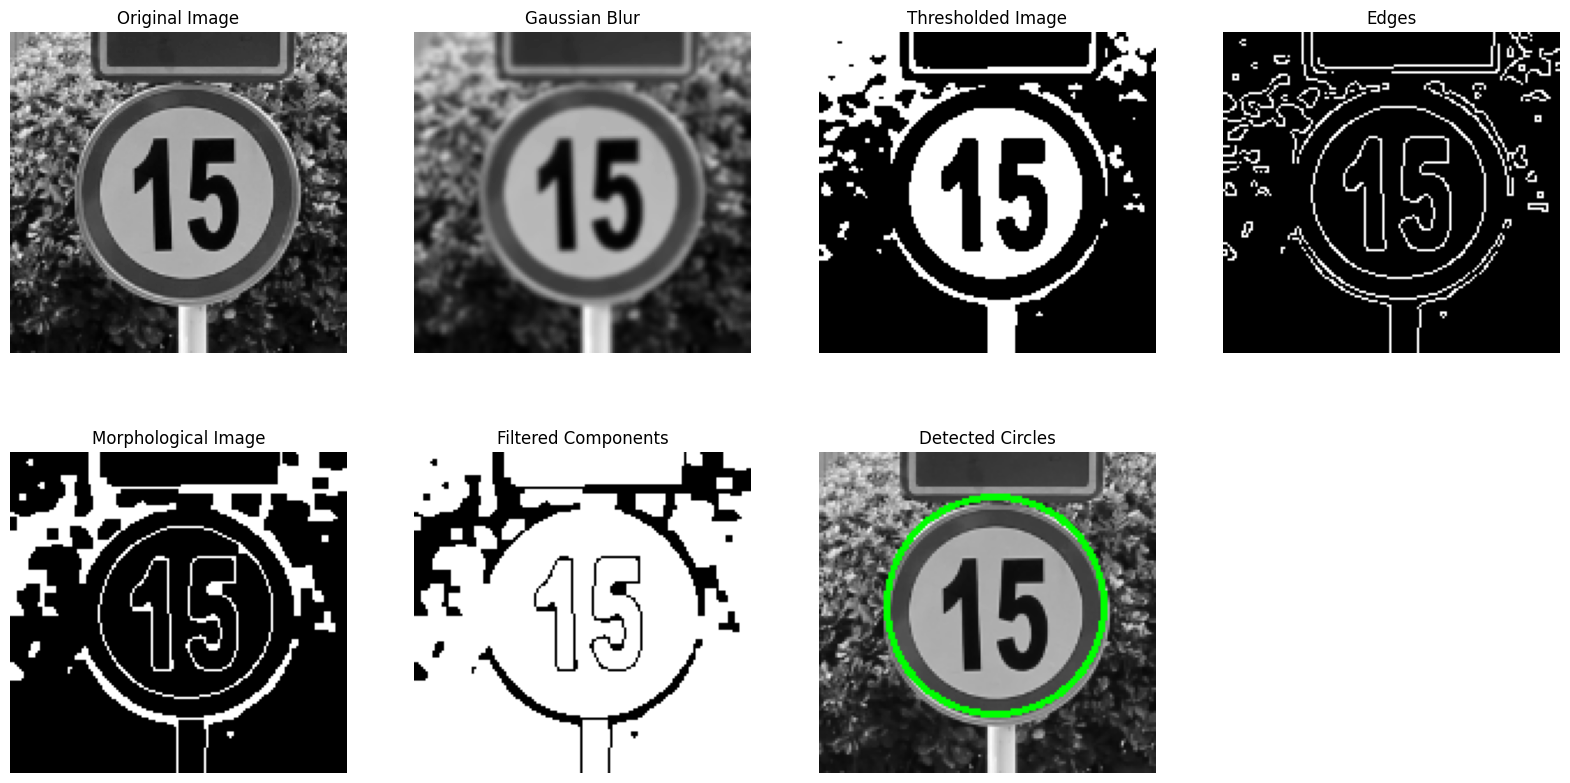

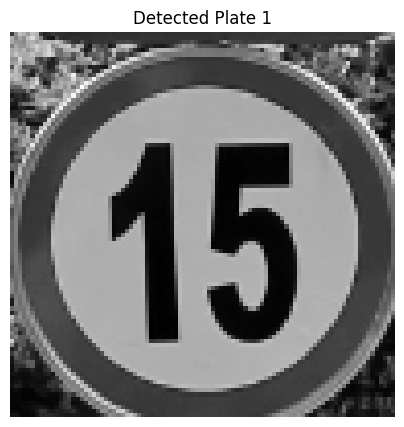

<Figure size 640x480 with 0 Axes>

In [321]:
detector = TrafficSignDetector(images_dir="images_gray", train_images_dir="train")
detector.process_image("train_easy_1.png")
detector.visualize_results()


In [322]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


class TrafficSignDetector:
    def __init__(self, images_dir, train_images_dir):
        """
        Initialize the TrafficSignDetector with directories for images.

        :param images_dir: Path to the root image directory
        :param train_images_dir: Path to the training images subdirectory
        """
        self.images_dir = images_dir
        self.train_images_dir = train_images_dir

        # Placeholder for image dimensions and processing steps
        self.height = None
        self.width = None
        self.gray_image = None
        self.histofram_eq_image = None
        self.blurred_image = None
        self.thresholded_image = None
        self.edges = None
        self.eroded_image = None
        self.filtered_components = None
        self.output_image = None
        self.circles = None
        self.detected_plates = []

    def process_image(self, image_name):
        """
        Process an image through the detection pipeline.
        
        :param image_name: Filename of the image to process
        """
        # 1. Load and convert to grayscale
        image_path = os.path.join(self.images_dir, self.train_images_dir, image_name)
        self.gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        self.height, self.width = self.gray_image.shape
        
        # 2. Histogram equalization
        self.histofram_eq_image = cv2.equalizeHist(self.gray_image)
        

        # 3. Gaussian blur
        kernel_size = (self.width // 50, self.height // 50)  # Relative kernel size
        kernel_size = (max(3, kernel_size[0] | 1), max(3, kernel_size[1] | 1))  # Ensure odd size
        self.blurred_image = cv2.GaussianBlur(self.histofram_eq_image, kernel_size, 0)

        # 4. Thresholding
        _, self.thresholded_image = cv2.threshold(self.blurred_image, 120, 255, cv2.THRESH_BINARY)

        # 5. Edge detection
        edge_threshold1 = 100
        edge_threshold2 = 200
        self.edges = cv2.Canny(self.thresholded_image, edge_threshold1, edge_threshold2)

        # 6. Morphological operations
        kernel_size = (self.width // 100, self.height // 100)  # Relative kernel size
        kernel_size = (max(3, kernel_size[0]), max(3, kernel_size[1]))  # Ensure minimum size
        kernel = np.ones(kernel_size, np.uint8)
        dilated_image = cv2.dilate(self.edges, kernel, iterations=1)
        self.eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

        # 7. Connected components analysis
        min_area = (self.width * self.height) // 50  # Relative minimum area
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(self.eroded_image)
        self.filtered_components = np.zeros_like(self.eroded_image)
        for label, stat in enumerate(stats):
            if stat[cv2.CC_STAT_AREA] > min_area:
                aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
                if 0.8 < aspect_ratio < 1.2:  # Approximate square/circle shape
                    self.filtered_components[labels == label] = 255

        # 8. Circle detection (Hough Transform)
        min_radius = min(self.height // 5, self.width // 5)  # Relative to image height
        max_radius = max(self.height // 2, self.width // 2)
        self.circles = cv2.HoughCircles(
            self.filtered_components,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=min(self.height // 5, self.width // 5),
            param1=50,
            param2=30,
            minRadius=min_radius,
            maxRadius=max_radius,
        )

        # 9. Draw detected circles and extract plates
        self.output_image = cv2.cvtColor(self.gray_image, cv2.COLOR_GRAY2BGR)
        if self.circles is not None:
            self.circles = np.uint16(np.around(self.circles))
            for circle in self.circles[0, :]:
                x, y, r = circle
                cv2.circle(self.output_image, (x, y), r, (0, 255, 0), 2)
                cropped_plate = self.gray_image[max(0, y - r) : min(self.height, y + r), max(0, x - r) : min(self.width, x + r)]
                self.detected_plates.append(cropped_plate)

    def visualize_results(self):
        """
        Visualize intermediate results and detected plates.
        """
        titles = [
            "Original Image",
            "Histogram Equalization",
            "Gaussian Blur",
            "Thresholded Image",
            "Edges",
            "Morphological Image",
            "Filtered Components",
            "Detected Circles",
        ]
        images = [
            self.gray_image,
            self.histofram_eq_image,
            self.blurred_image,
            self.thresholded_image,
            self.edges,
            self.eroded_image,
            self.filtered_components,
            self.output_image,
        ]

        plt.figure(figsize=(20, 10))
        for i, (title, img) in enumerate(zip(titles, images), 1):
            if img is not None:
                plt.subplot(2, 4, i)
                plt.title(title)
                cmap = "gray" if len(img.shape) == 2 else None
                plt.imshow(img, cmap=cmap)
                plt.axis("off")

        # Visualize detected plates
        for i, plate in enumerate(self.detected_plates, 1):
            plt.figure(figsize=(5, 5))
            plt.title(f"Detected Plate {i}")
            plt.imshow(plate, cmap="gray")
            plt.axis("off")
            plt.show()

        plt.tight_layout()
        plt.show()


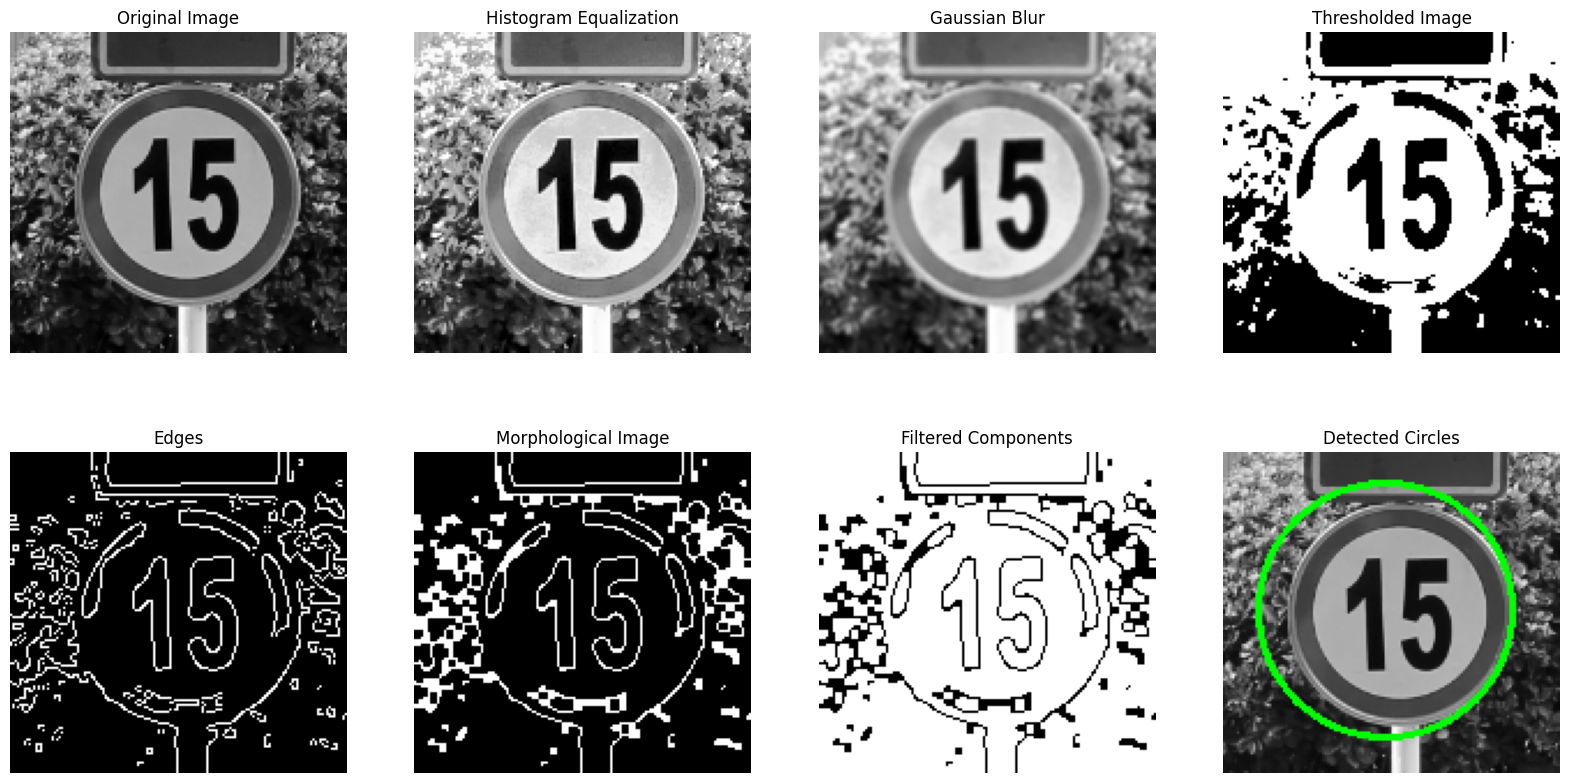

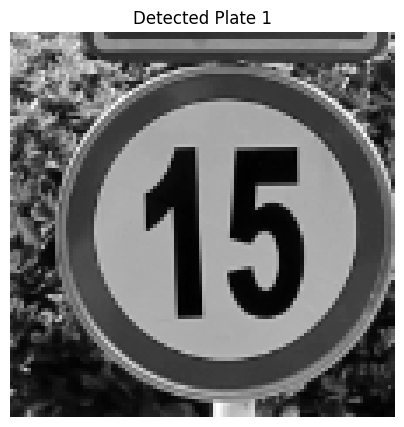

<Figure size 640x480 with 0 Axes>

In [323]:
detector = TrafficSignDetector(images_dir="images_gray", train_images_dir="train")
detector.process_image("train_easy_1.png")
detector.visualize_results()

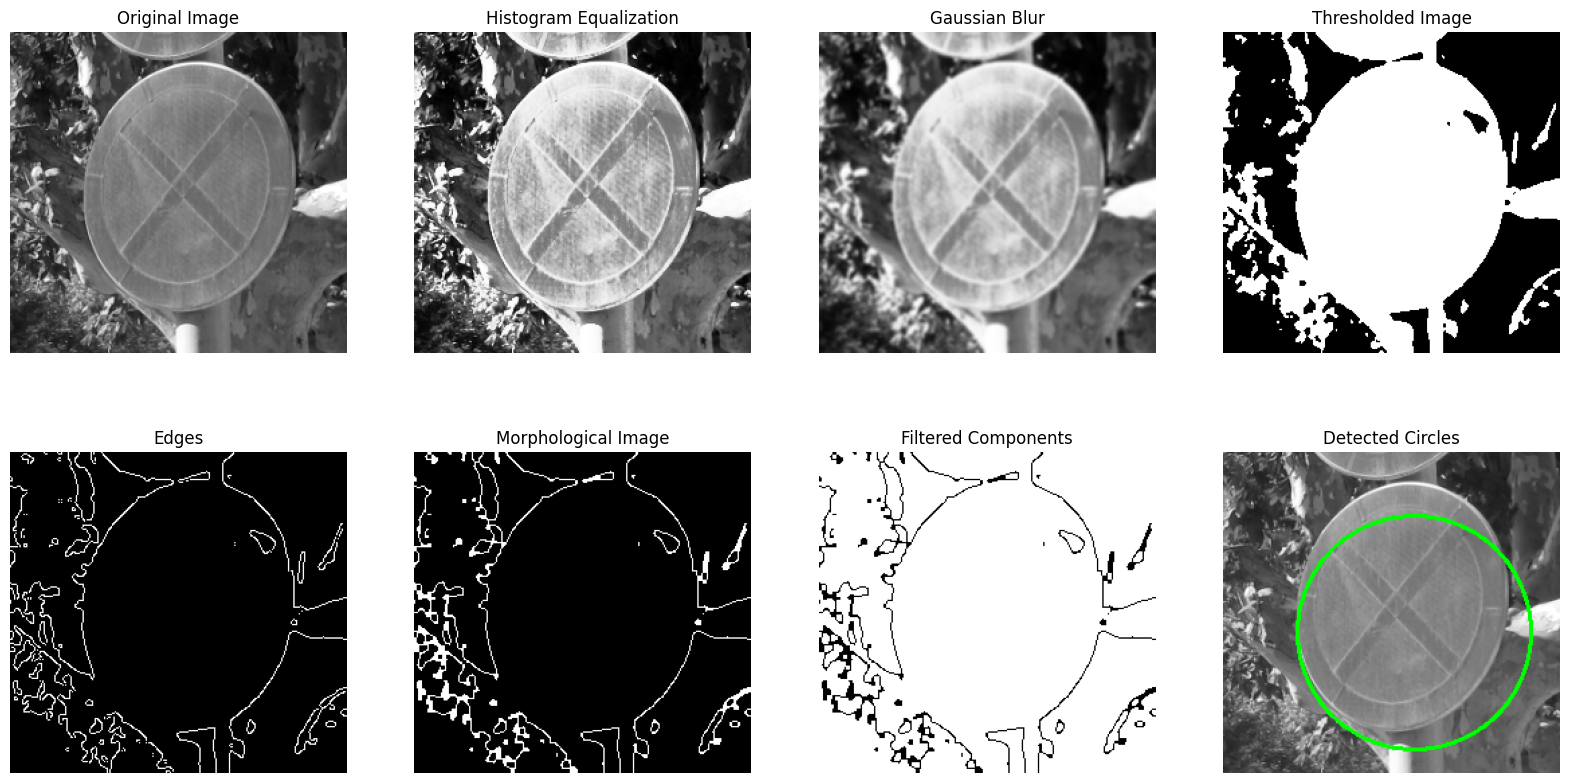

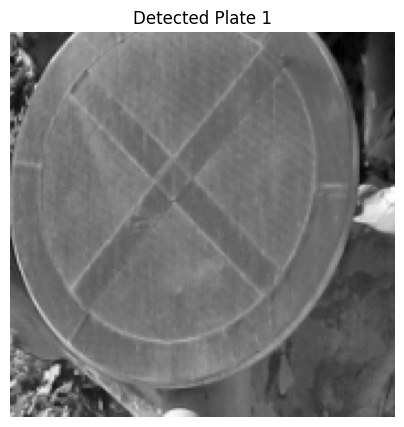

<Figure size 640x480 with 0 Axes>

In [324]:
detector = TrafficSignDetector(images_dir="images_gray", train_images_dir="train")
detector.process_image("train_easy_2.png")
detector.visualize_results()

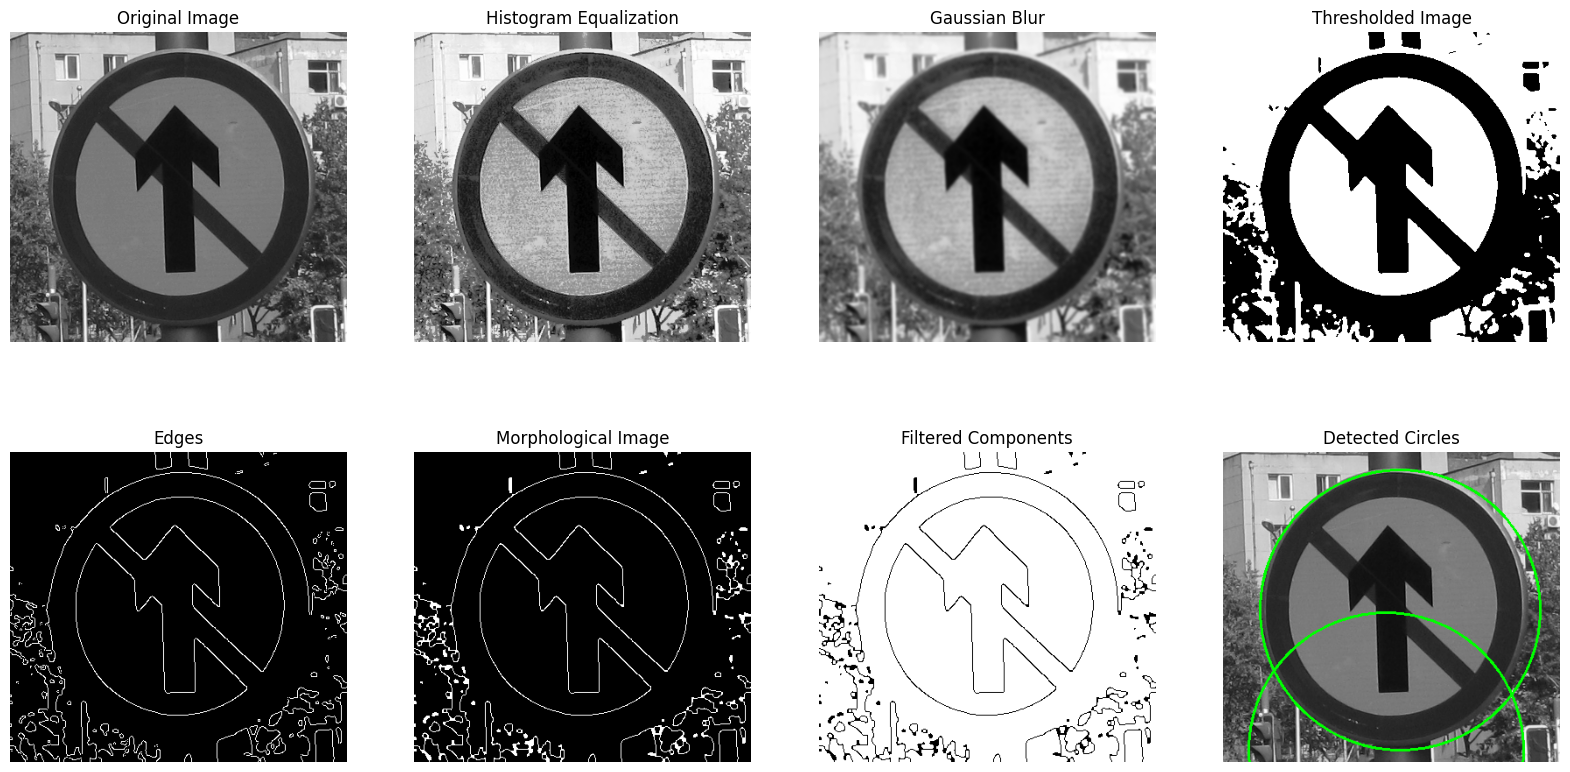

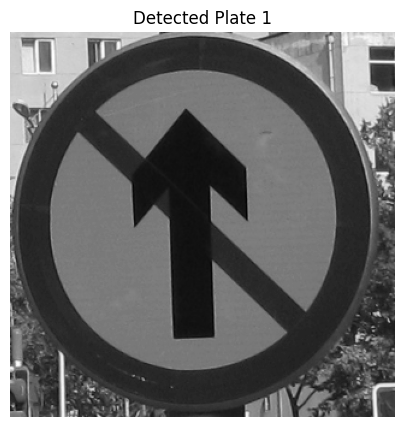

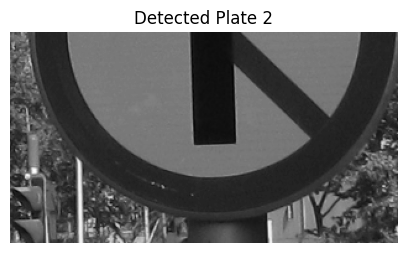

<Figure size 640x480 with 0 Axes>

In [325]:
detector = TrafficSignDetector(images_dir="images_gray", train_images_dir="test")
detector.process_image("test_easy_1.png")
detector.visualize_results()

# Try to ignore overlapp

In [361]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


class TrafficSignDetector:
    def __init__(self, images_dir, train_images_dir):
        """
        Initialize the TrafficSignDetector with directories for images.

        :param images_dir: Path to the root image directory
        :param train_images_dir: Path to the training images subdirectory
        """
        self.images_dir = images_dir
        self.train_images_dir = train_images_dir

        # Placeholder for image dimensions and processing steps
        self.height = None
        self.width = None
        self.gray_image = None
        self.histofram_eq_image = None
        self.blurred_image = None
        self.thresholded_image = None
        self.edges = None
        self.eroded_image = None
        self.filtered_components = None
        self.output_image = None
        self.circles = None
        self.detected_plates = []

    def process_image(self, image_name):
        """
        Process an image through the detection pipeline.
        
        :param image_name: Filename of the image to process
        """
        # 1. Load and convert to grayscale
        image_path = os.path.join(self.images_dir, self.train_images_dir, image_name)
        self.gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        self.height, self.width = self.gray_image.shape
        

        

        # 3. Gaussian blur
        kernel_size = (self.width // 50, self.height // 50)  # Relative kernel size
        kernel_size = (max(3, kernel_size[0] | 1), max(3, kernel_size[1] | 1))  # Ensure odd size
        self.blurred_image = cv2.GaussianBlur(self.gray_image, kernel_size, 0)

        

        # 4. Thresholding
        mask = self.blurred_image > 100
        self.thresholded_image = mask * self.blurred_image
        
        # 5. Edge detection
        edge_threshold1 = 100
        edge_threshold2 = 200
        self.edges = cv2.Canny(self.thresholded_image, edge_threshold1, edge_threshold2)

        # 6. Morphological operations
        kernel_size = (self.width // 80, self.height // 80)  # Relative kernel size
        kernel_size = (max(3, kernel_size[0]), max(3, kernel_size[1]))  # Ensure minimum size
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
        dilated_image = cv2.dilate(self.edges, kernel, iterations=1)
        self.eroded_image = cv2.erode(dilated_image, kernel, iterations=1)

        # 7. Connected components analysis
        min_area = (self.width * self.height) // 50  # Relative minimum area
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(self.eroded_image)
        self.filtered_components = np.zeros_like(self.eroded_image)
        for label, stat in enumerate(stats):
            if stat[cv2.CC_STAT_AREA] > min_area:
                aspect_ratio = stat[cv2.CC_STAT_WIDTH] / stat[cv2.CC_STAT_HEIGHT]
                if 0.8 < aspect_ratio < 1.2:  # Approximate square/circle shape
                    self.filtered_components[labels == label] = 255

        # 8. Circle detection (Hough Transform)
        min_radius = min(self.height // 5, self.width // 5)  # Relative to image height
        max_radius = max(self.height // 2, self.width // 2)
        self.circles = cv2.HoughCircles(
            self.filtered_components,
            cv2.HOUGH_GRADIENT,
            dp=1,
            minDist=min(self.height // 5, self.width // 5),
            param1=50,
            param2=30,
            minRadius=min_radius,
            maxRadius=max_radius,
        )

        # 9. Remove overlapping circles
        self.remove_overlapping_circles()

        # 10. Draw detected circles and extract plates
        self.output_image = cv2.cvtColor(self.gray_image, cv2.COLOR_GRAY2BGR)
        if self.circles is not None:
            self.circles = np.uint16(np.around(self.circles))
            for circle in self.circles[0, :]:
                x, y, r = circle
                cv2.circle(self.output_image, (x, y), r, (0, 255, 0), 2)
                cropped_plate = self.gray_image[max(0, y - r) : min(self.height, y + r), max(0, x - r) : min(self.width, x + r)]
                self.detected_plates.append(cropped_plate)

    def remove_overlapping_circles(self, overlap_threshold=0.3):
        """
        Remove overlapping circles from the list based on a threshold.

        :param overlap_threshold: The minimum overlap ratio to consider two circles as overlapping
        """
        if self.circles is not None:
            valid_circles = []
            for i, circle1 in enumerate(self.circles[0, :]):
                x1, y1, r1 = circle1
                is_overlapping = False
                
                # If valid_circles is empty, we can add the first circle directly
                if len(valid_circles) == 0:
                    valid_circles.append(circle1)
                    continue
                
                for circle2 in valid_circles:
                    x2, y2, r2 = circle2
                    # Calculate distance between centers
                    distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                    print(x1, y1, r1, x2, y2, r2, distance)
                    # Check if the circles overlap more than the threshold
                    print(distance, (r1 + r2) * (1 - overlap_threshold))
                    if distance < (r1 + r2) * (1 - overlap_threshold):
                        is_overlapping = True
                        break

                if not is_overlapping:
                    valid_circles.append(circle1)
            
            # Update self.circles with the filtered non-overlapping circles
            self.circles = np.array([valid_circles], dtype=np.uint16)


    def visualize_results(self):
        """
        Visualize intermediate results and detected plates.
        """
        titles = [
            "Original Image",
            "Gaussian Blur",
            "Thresholded Image",
            "Edges",
            "Morphological Image",
            "Filtered Components",
            "Detected Circles",
        ]
        images = [
            self.gray_image,
            self.blurred_image,
            self.thresholded_image,
            self.edges,
            self.eroded_image,
            self.filtered_components,
            self.output_image,
        ]

        plt.figure(figsize=(20, 10))
        for i, (title, img) in enumerate(zip(titles, images), 1):
            if img is not None:
                plt.subplot(2, 4, i)
                plt.title(title)
                cmap = "gray" if len(img.shape) == 2 else None
                plt.imshow(img, cmap=cmap)
                #plt.axis("off")

        # Visualize detected plates
        for i, plate in enumerate(self.detected_plates, 1):
            plt.figure(figsize=(5, 5))
            plt.title(f"Detected Plate {i}")
            plt.imshow(plate, cmap="gray")
            #plt.axis("off")
            plt.show()

        plt.tight_layout()
        plt.show()


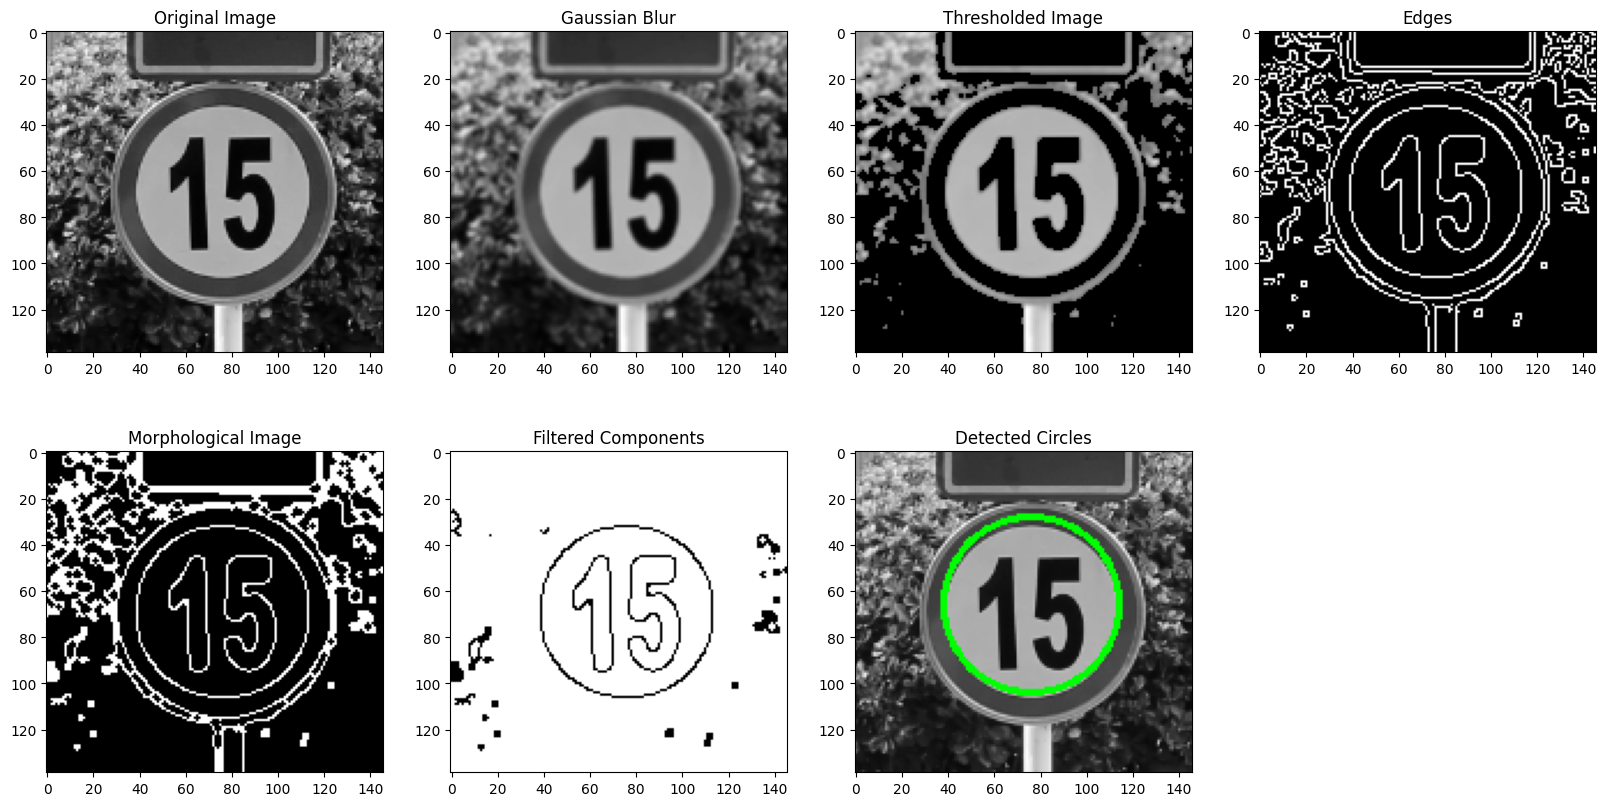

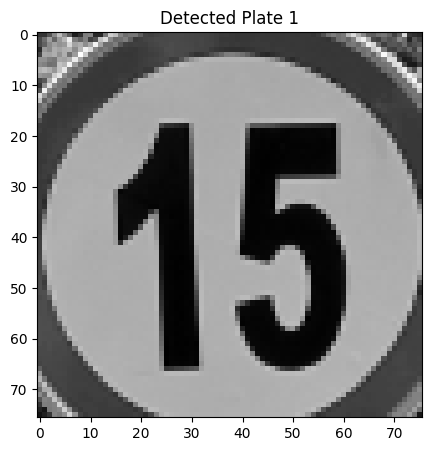

<Figure size 640x480 with 0 Axes>

In [362]:
detector = TrafficSignDetector(images_dir="images_gray", train_images_dir="train")
detector.process_image("train_easy_1.png")
detector.visualize_results()

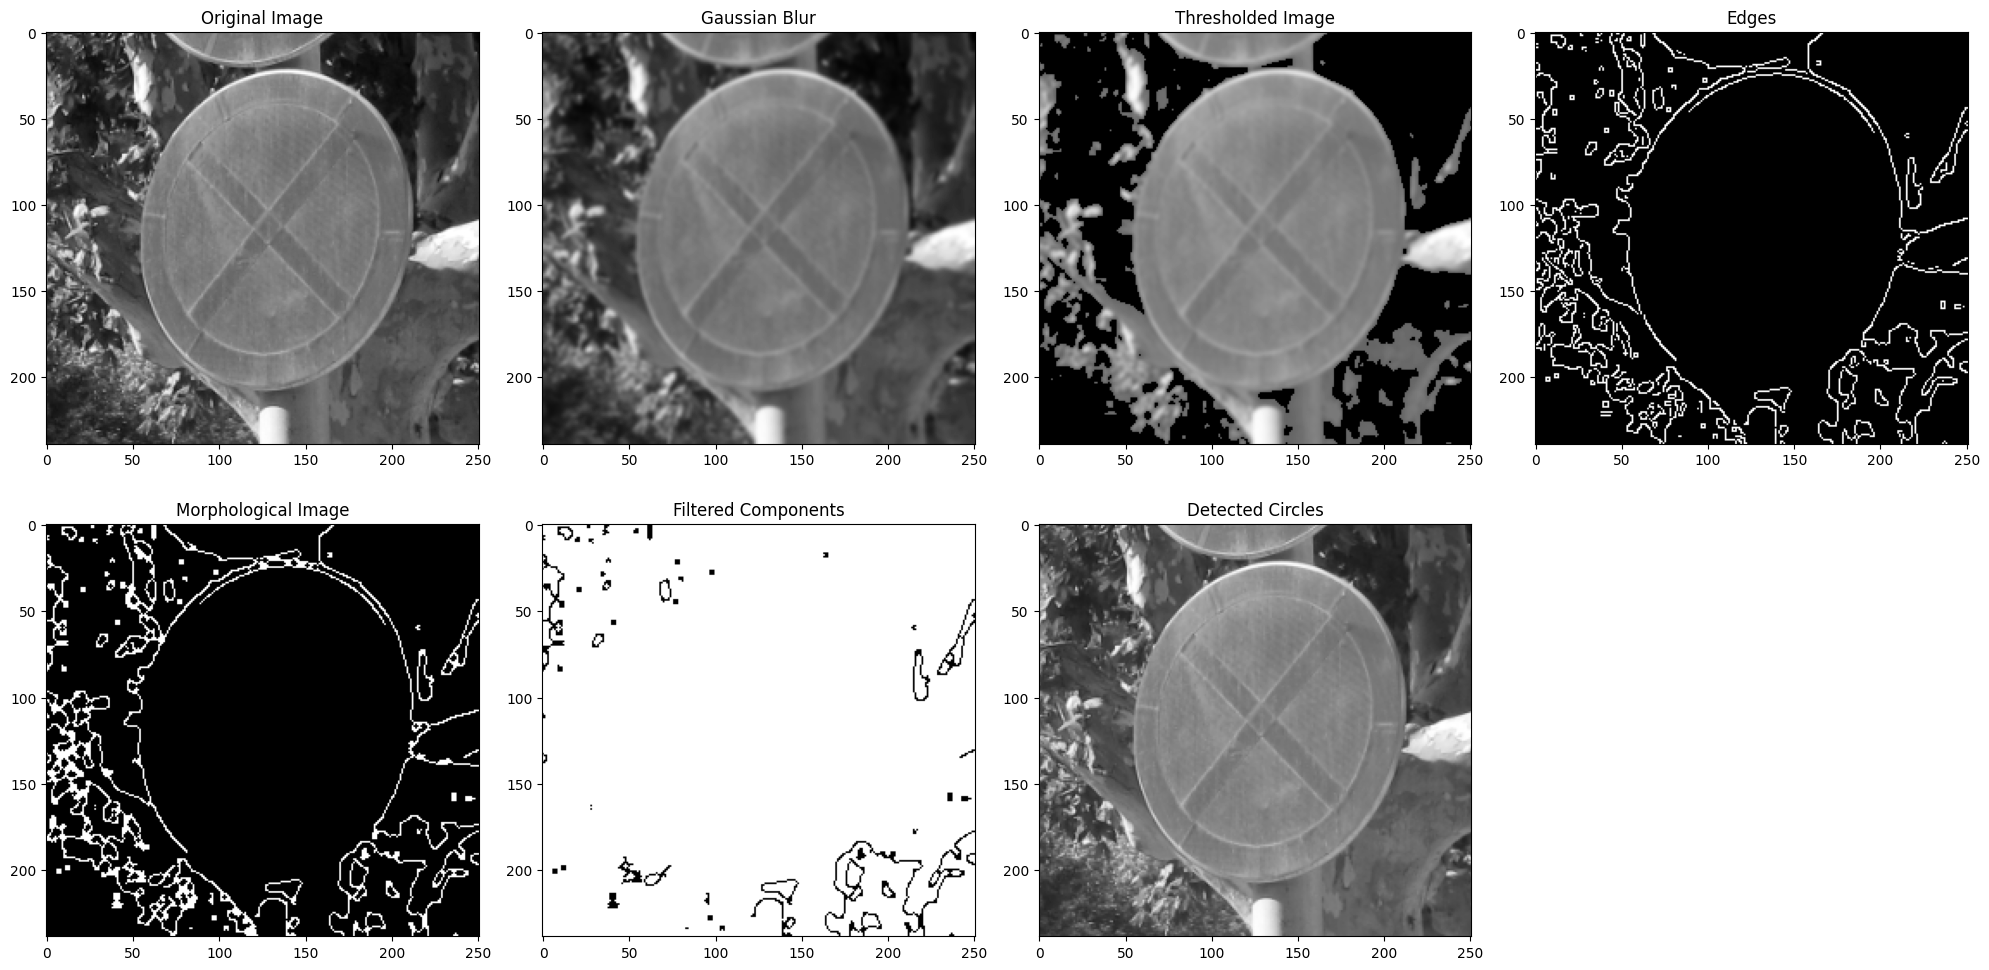

In [363]:
detector = TrafficSignDetector(images_dir="images_gray", train_images_dir="train")
detector.process_image("train_easy_2.png")
detector.visualize_results()

126.5 158.5 100.1 198.5 177.5 122.8 74.46476
74.46476 156.03
164.5 353.5 134.8 198.5 177.5 122.8 179.25401
179.25401 180.32


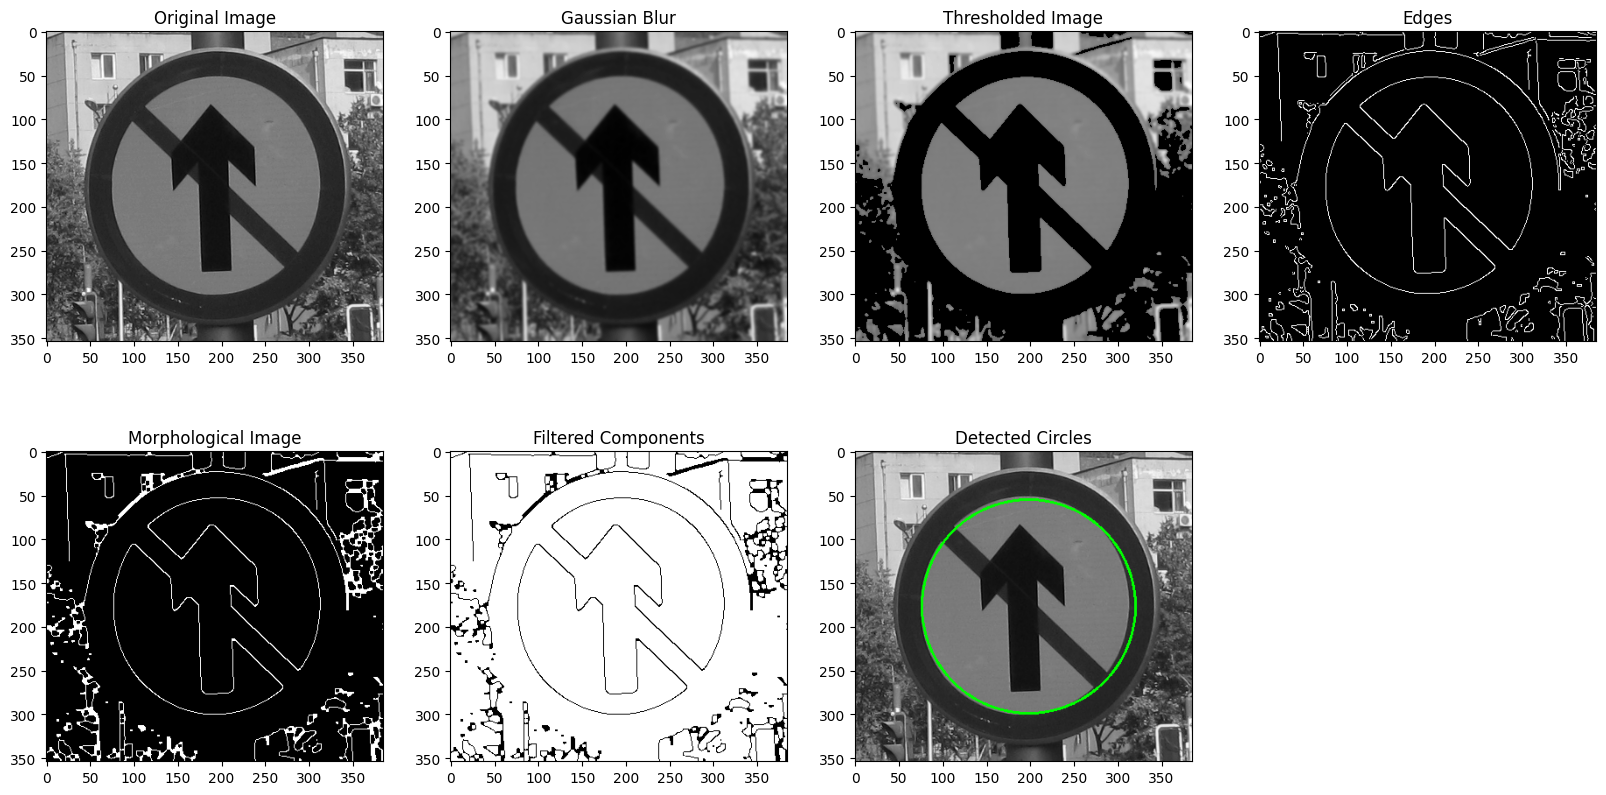

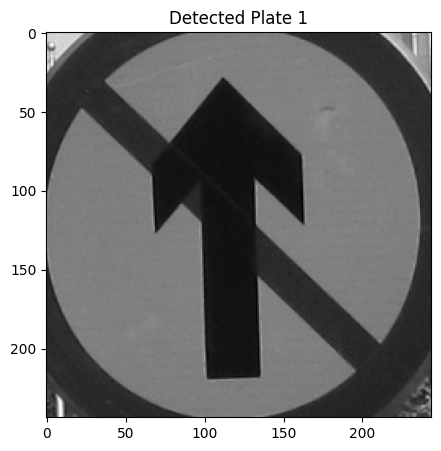

<Figure size 640x480 with 0 Axes>

In [364]:
detector = TrafficSignDetector(images_dir="images_gray", train_images_dir="test")
detector.process_image("test_easy_1.png")
detector.visualize_results()

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
/var/folders/ps/w20y7l6s0czd7vj9t9xzwbbc0000gn/T/ipykernel_89677/3864952158.py:103: RuntimeWarning: overflow encountered in scalar subtract
  cropped_plate = self.gray_image[max(0, y - r) : min(self.height, y + r), max(0, x - r) : min(self.width, x + r)]


728.5 749.5 225.7 248.5 762.5 216.9 480.176
480.176 309.81998
732.5 306.5 240.3 248.5 762.5 216.9 664.97516
664.97516 320.04
732.5 306.5 240.3 728.5 749.5 225.7 443.01807
443.01807 326.19998
222.5 295.5 239.1 248.5 762.5 216.9 467.7232
467.7232 319.19998
222.5 295.5 239.1 728.5 749.5 225.7 679.8176
679.8176 325.36
222.5 295.5 239.1 732.5 306.5 240.3 510.11862
510.11862 335.58002
737.5 525.5 326.7 248.5 762.5 216.9 543.40594
543.40594 380.52
737.5 525.5 326.7 728.5 749.5 225.7 224.18073
224.18073 386.68002
479.5 301.5 220.9 248.5 762.5 216.9 515.63745
515.63745 306.46
479.5 301.5 220.9 728.5 749.5 225.7 512.54755
512.54755 312.61996
479.5 301.5 220.9 732.5 306.5 240.3 253.04941
253.04941 322.84


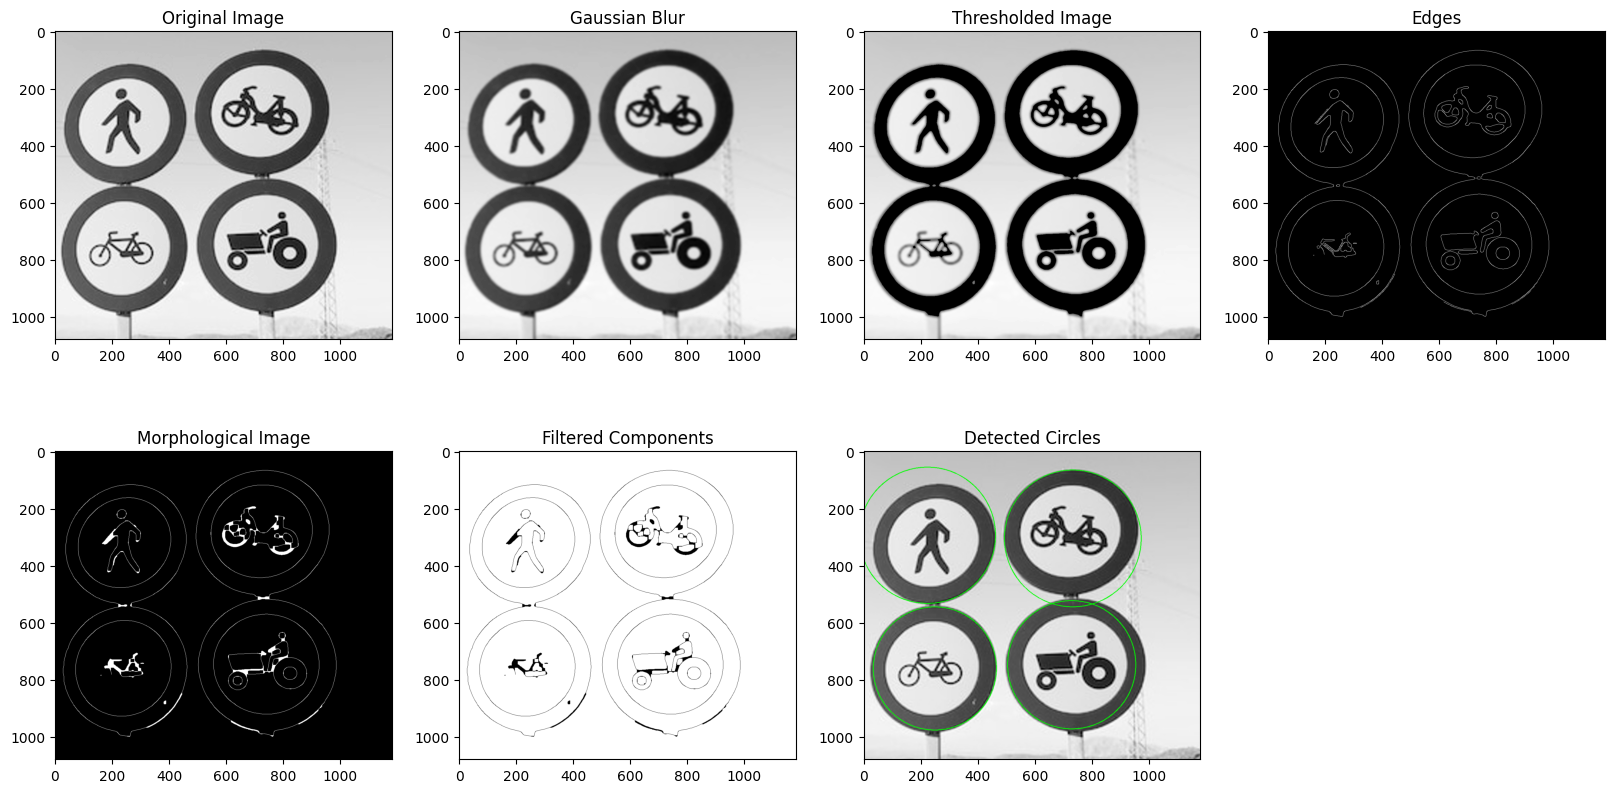

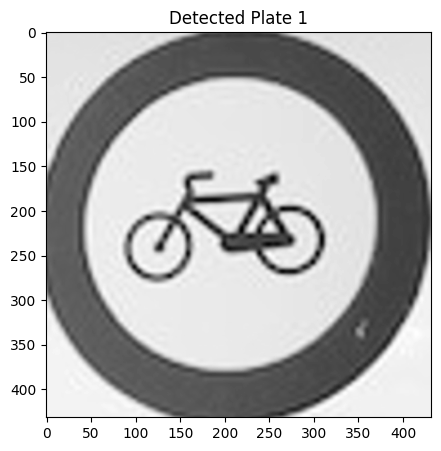

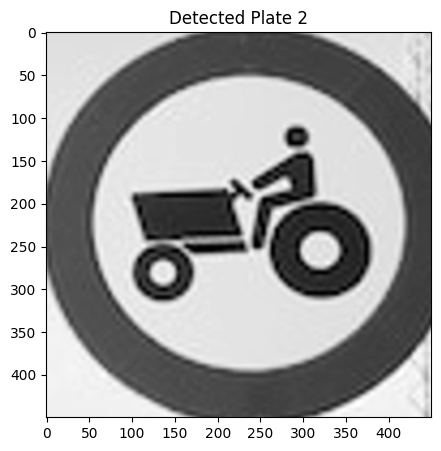

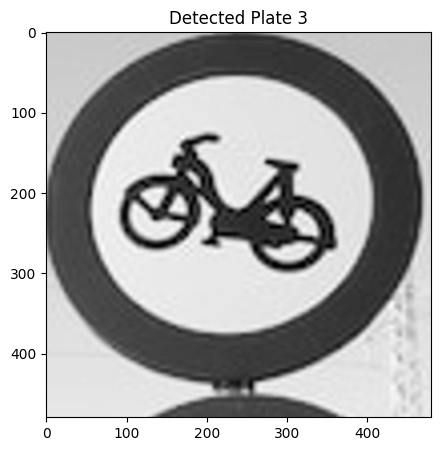

/var/folders/ps/w20y7l6s0czd7vj9t9xzwbbc0000gn/T/ipykernel_89677/3864952158.py:177: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(plate, cmap="gray")


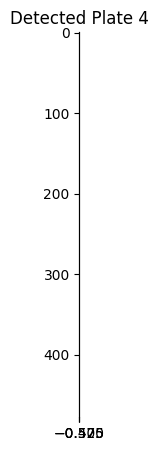

<Figure size 640x480 with 0 Axes>

In [354]:
detector = TrafficSignDetector(images_dir="images_gray", train_images_dir="test")
detector.process_image("test_easy_2.png")
detector.visualize_results()